<font size=6>K-Means Clustering</font><br>
<font size=5>Autor: <font color="#2890f9"> María Camila Gómez Hernández <br></font>
<font size=3>GitHub: <font color="#A371F7"> @TrashCam9 <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> mc.gomezh1</font>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
def plot_silhouette(X, n_clusters, random_state = 0):
    for n in n_clusters:
        kmeans_ = KMeans(n_clusters = n, random_state = random_state)
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(preds_.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        centers = kmeans_.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        ax2.set_title('The visualization of the clustered data')
        ax2.set_xlabel('Feature space for the 1st feature')
        ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()

In [3]:
data = pd.read_csv('./data/data_procesada.csv', delimiter=';')

<h2>Selección de atributos</h2>

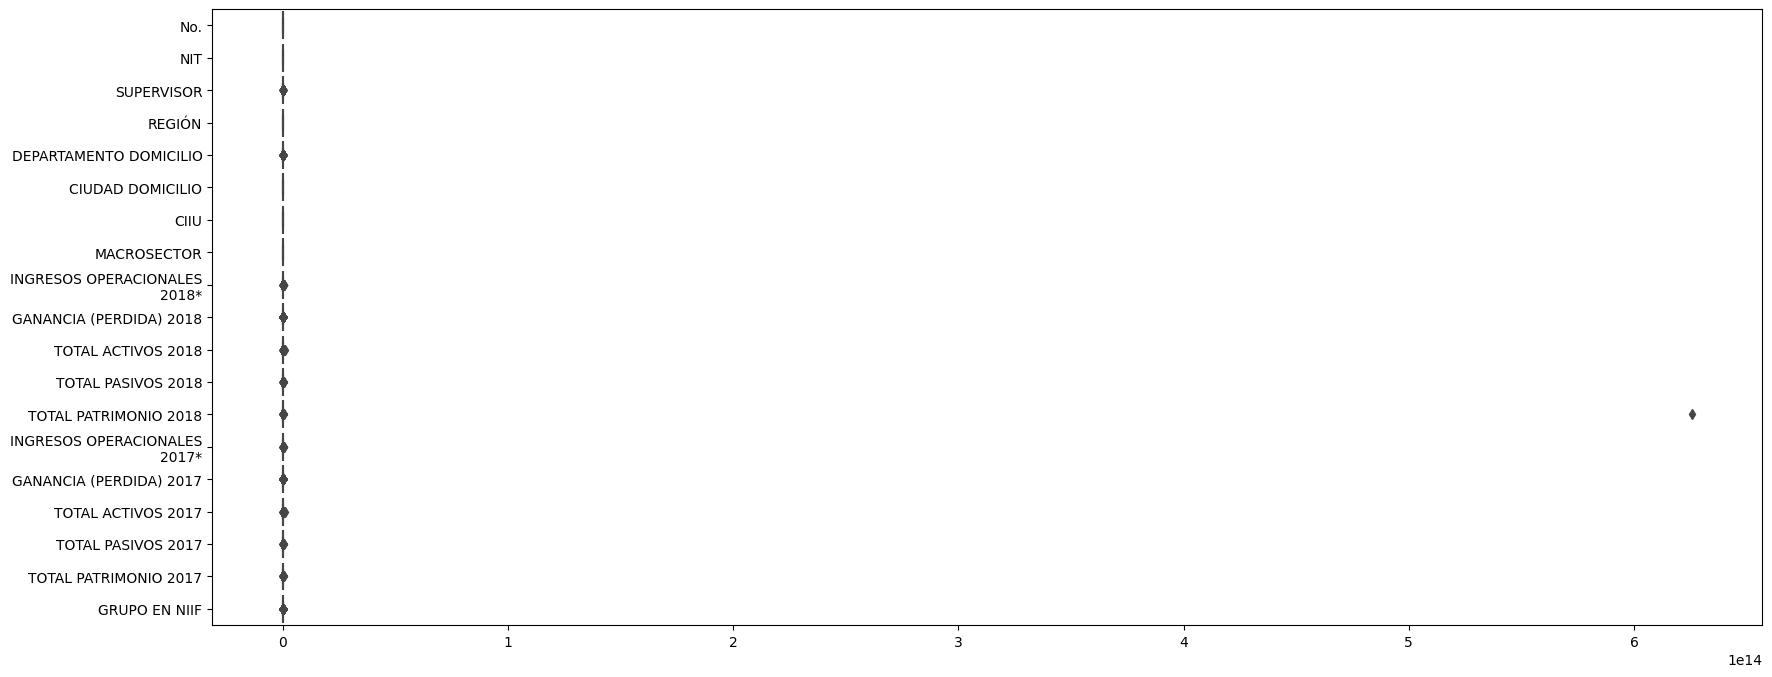

In [4]:
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data = data, orient = 'h')

In [5]:
data['TOTAL PATRIMONIO 2018_log'] = np.log(data['TOTAL PATRIMONIO 2018'])
del data['TOTAL PATRIMONIO 2018']

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
data['TOTAL ACTIVOS 2017_log'] = np.log(data['TOTAL ACTIVOS 2017'])
del data['TOTAL ACTIVOS 2017']

In [7]:
data['TOTAL ACTIVOS 2018_log'] = np.log(data['TOTAL ACTIVOS 2018'])
del data['TOTAL ACTIVOS 2018']

In [8]:
data['TOTAL PATRIMONIO 2017_log'] = np.log(data['TOTAL PATRIMONIO 2017'])
del data['TOTAL PATRIMONIO 2017']

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
data['INGRESOS OPERACIONALES 2017_log'] = np.log(data['INGRESOS OPERACIONALES\n2017*'])
del data['INGRESOS OPERACIONALES\n2017*']

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
data['INGRESOS OPERACIONALES 2018_log'] = np.log(data['INGRESOS OPERACIONALES\n2018*'])
del data['INGRESOS OPERACIONALES\n2018*']

In [11]:
data['TOTAL PASIVOS 2018_log'] = np.log(data['TOTAL PASIVOS 2018'])
del data['TOTAL PASIVOS 2018']

In [12]:
data['TOTAL PASIVOS 2017_log'] = np.log(data['TOTAL PASIVOS 2017'])
del data['TOTAL PASIVOS 2017']

In [13]:
data['GANANCIA (PERDIDA) 2017_log'] = np.log(data['GANANCIA (PERDIDA) 2017'])
del data['GANANCIA (PERDIDA) 2017']

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
data['GANANCIA (PERDIDA) 2018_log'] = np.log(data['GANANCIA (PERDIDA) 2018'])
del data['GANANCIA (PERDIDA) 2018']

c:\Users\camil\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
del data['No.']

In [16]:
del data['NIT']

In [17]:
del data['RAZON SOCIAL']

In [18]:
data_numeros = data.copy()
del data_numeros['SUPERVISOR']
del data_numeros['REGIÓN']
del data_numeros['DEPARTAMENTO DOMICILIO']
del data_numeros['CIUDAD DOMICILIO']
del data_numeros['CIIU']
del data_numeros['MACROSECTOR']
del data_numeros['GRUPO EN NIIF']

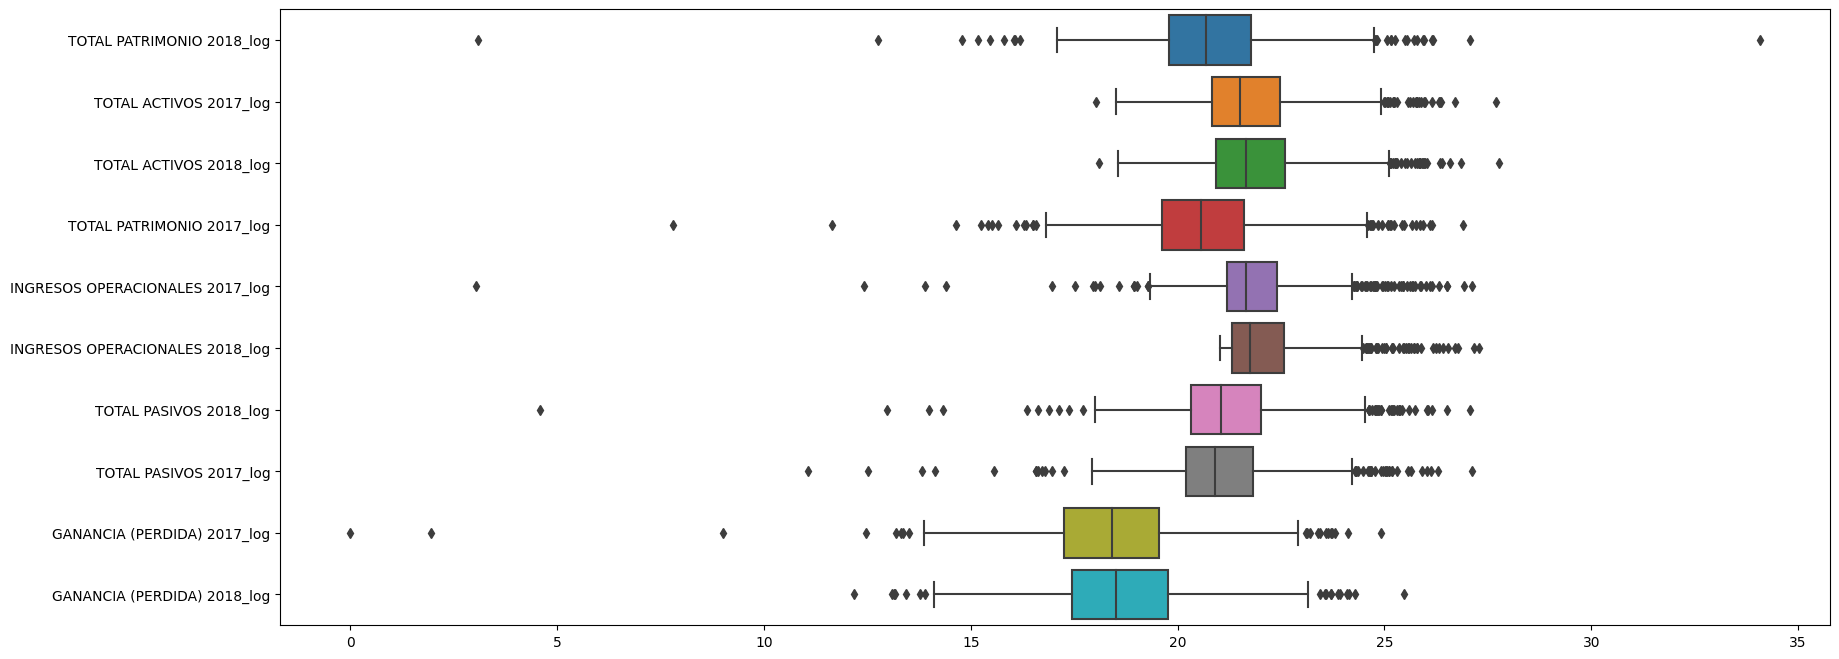

In [19]:
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data = data_numeros, orient = 'h')

<h3>Construcción de un primer modelo</h3>

In [20]:
features = ['GANANCIA (PERDIDA) 2018_log', 'TOTAL ACTIVOS 2018_log']

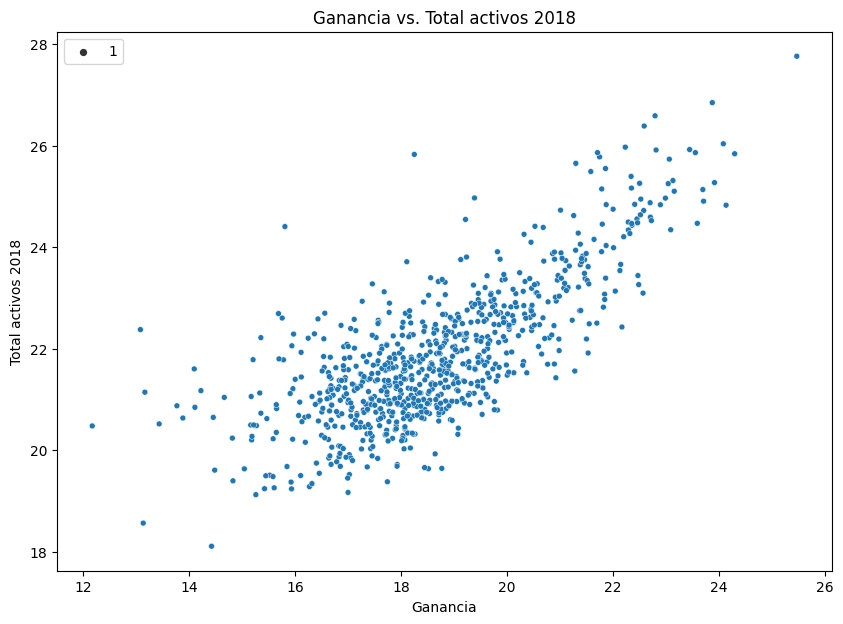

In [21]:
plt.figure(figsize = (10, 7))
ax = sns.scatterplot(x = data['GANANCIA (PERDIDA) 2018_log'], y = data['TOTAL ACTIVOS 2018_log'], size = 1)
plt.title('Ganancia vs. Total activos 2018')
plt.xlabel('Ganancia')
plt.ylabel('Total activos 2018')
plt.show()

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

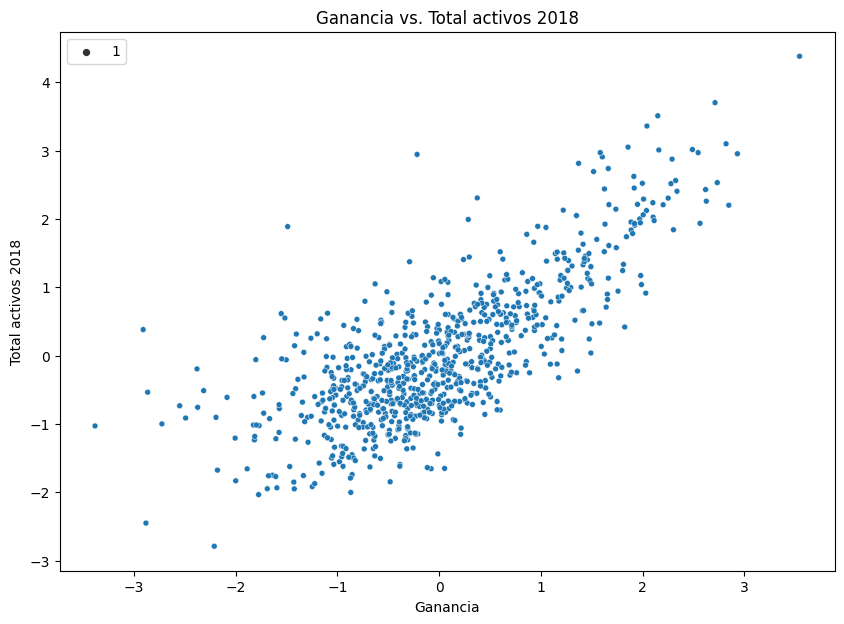

In [23]:
plt.figure(figsize = (10, 7))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], size = 1)
plt.title('Ganancia vs. Total activos 2018')
plt.xlabel('Ganancia')
plt.ylabel('Total activos 2018')
plt.show()

In [24]:
kmeans = KMeans(random_state = 0)

In [25]:
X = np.nan_to_num(X)

In [26]:
kmeans_preds = kmeans.fit_predict(X)

In [27]:
kmeans.n_iter_

12

<AxesSubplot:>

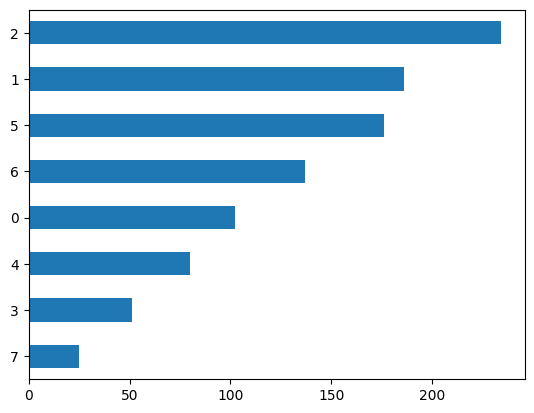

In [28]:
pd.Series(kmeans_preds).value_counts().sort_values().plot.barh()

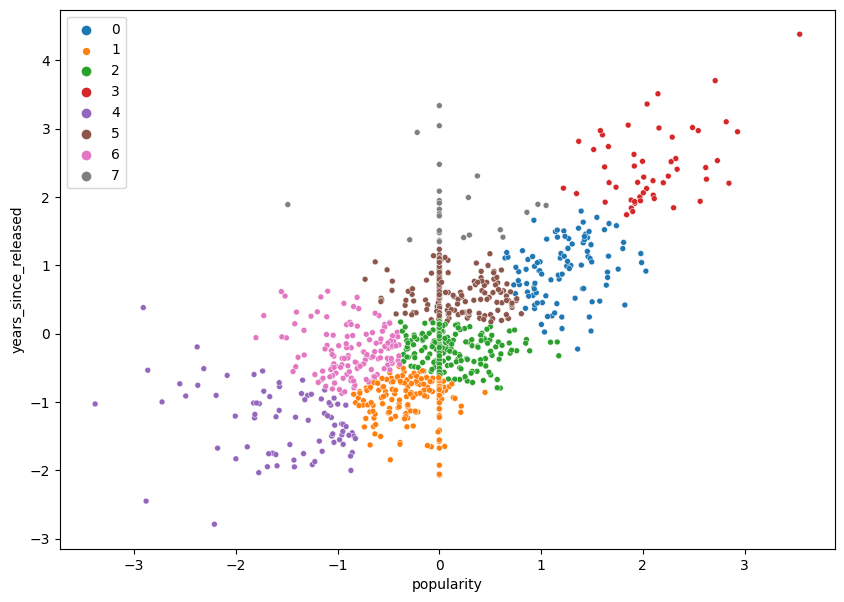

In [29]:
plt.figure(figsize = (10, 7))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans_preds, palette = 'tab10', size = 1)
plt.xlabel('popularity')
plt.ylabel('years_since_released')
plt.show()

In [30]:
# Se construiran 5 "modelos" de clustering con los siguientes tamaños de K
n_clusters = [2, 4, 6, 8, 10]

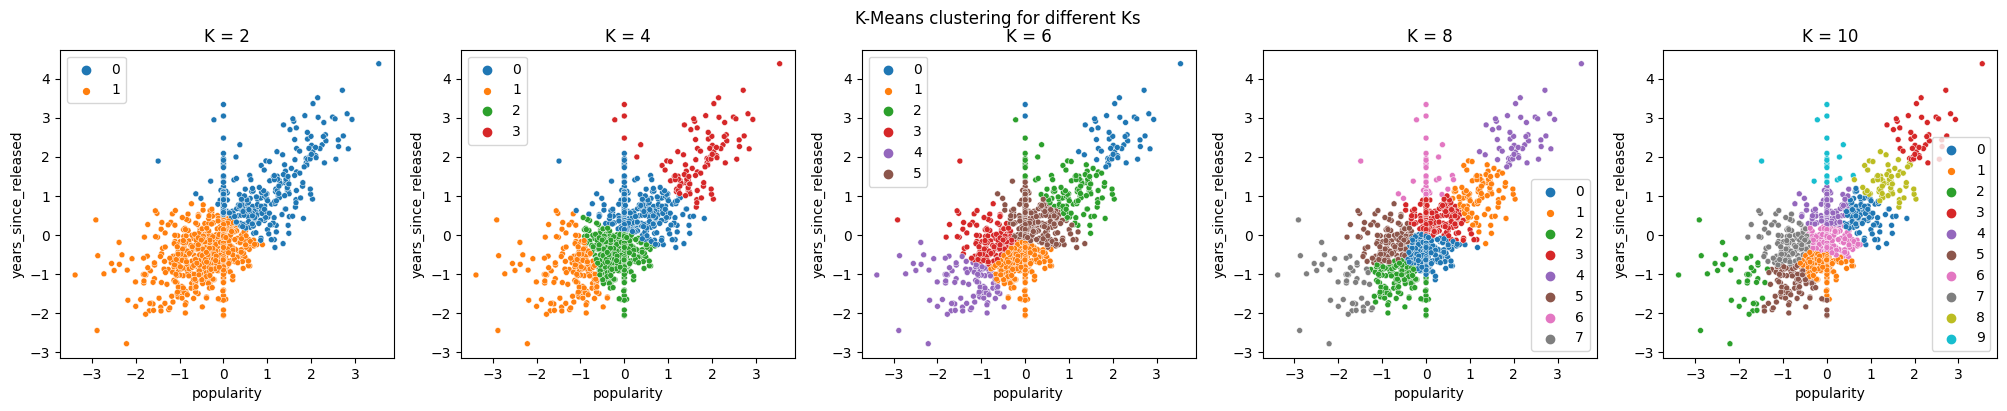

In [31]:
fig, axes = plt.subplots(1, 5, figsize = (25, 4))
fig.suptitle('K-Means clustering for different Ks')

i = 0
for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 1)
    
    sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans_.fit_predict(X), palette = 'tab10', size = 1, ax = axes[i])
    axes[i].set_title('K = {}'.format(n))
    axes[i].set_xlabel('popularity')
    axes[i].set_ylabel('years_since_released')
    i += 1 

<h3>Validación cuantitativa: Codo</h3>

In [32]:
n_clusters = range(2, 31)

In [33]:
kmeans_inertias = []

for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 2)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

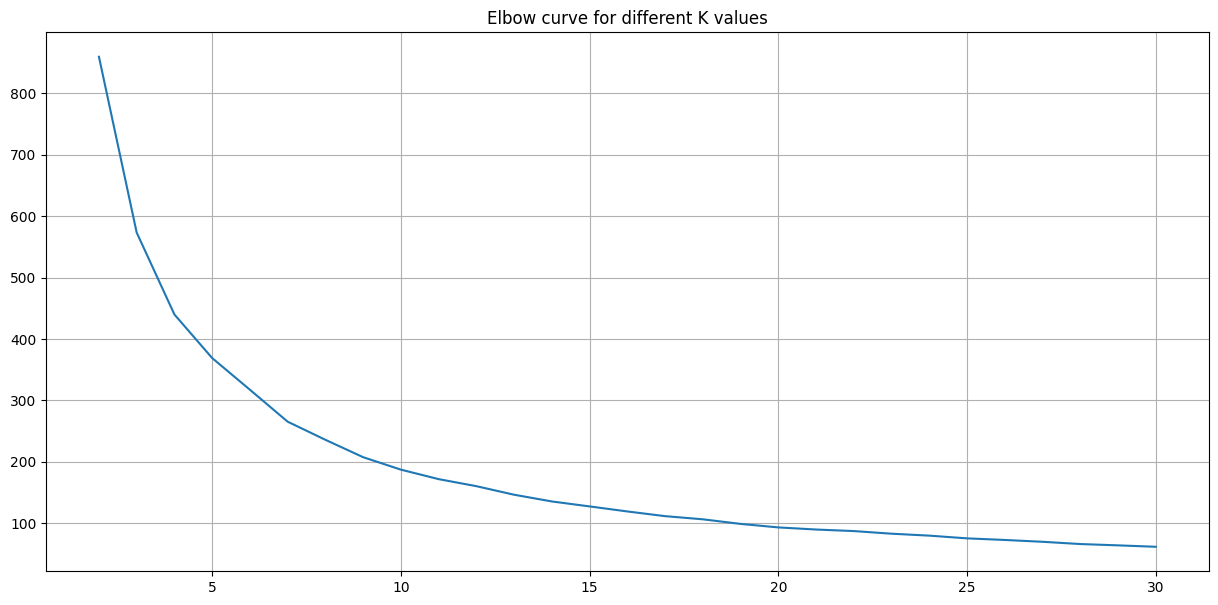

In [34]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.grid(True)
plt.show()

<h3>Validación cuantitativa: Método de la silueta</h3>

In [35]:
n_clusters = [2, 4, 6, 8, 10]

For n_clusters = 2 , the average silhouette score is : 0.4775798965113681
For n_clusters = 4 , the average silhouette score is : 0.36519021214307923
For n_clusters = 6 , the average silhouette score is : 0.35092219255711576
For n_clusters = 8 , the average silhouette score is : 0.349401971628412
For n_clusters = 10 , the average silhouette score is : 0.35084271516546645


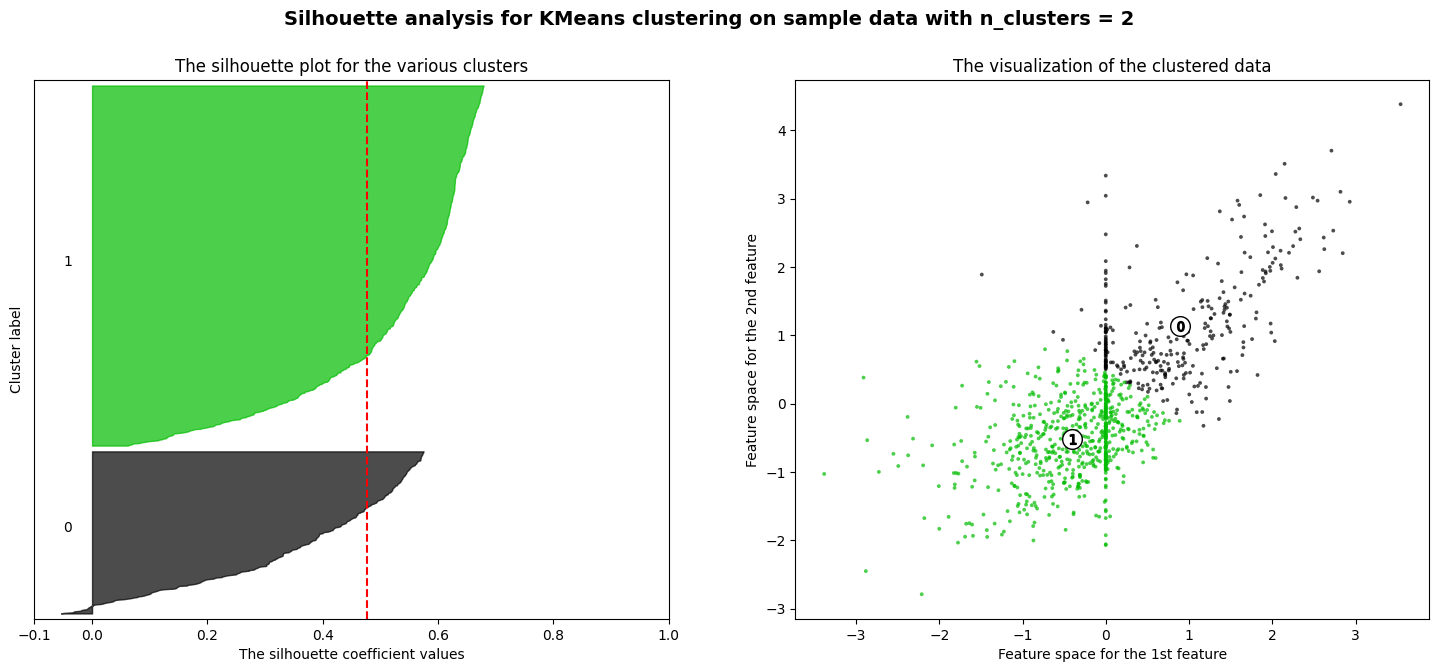

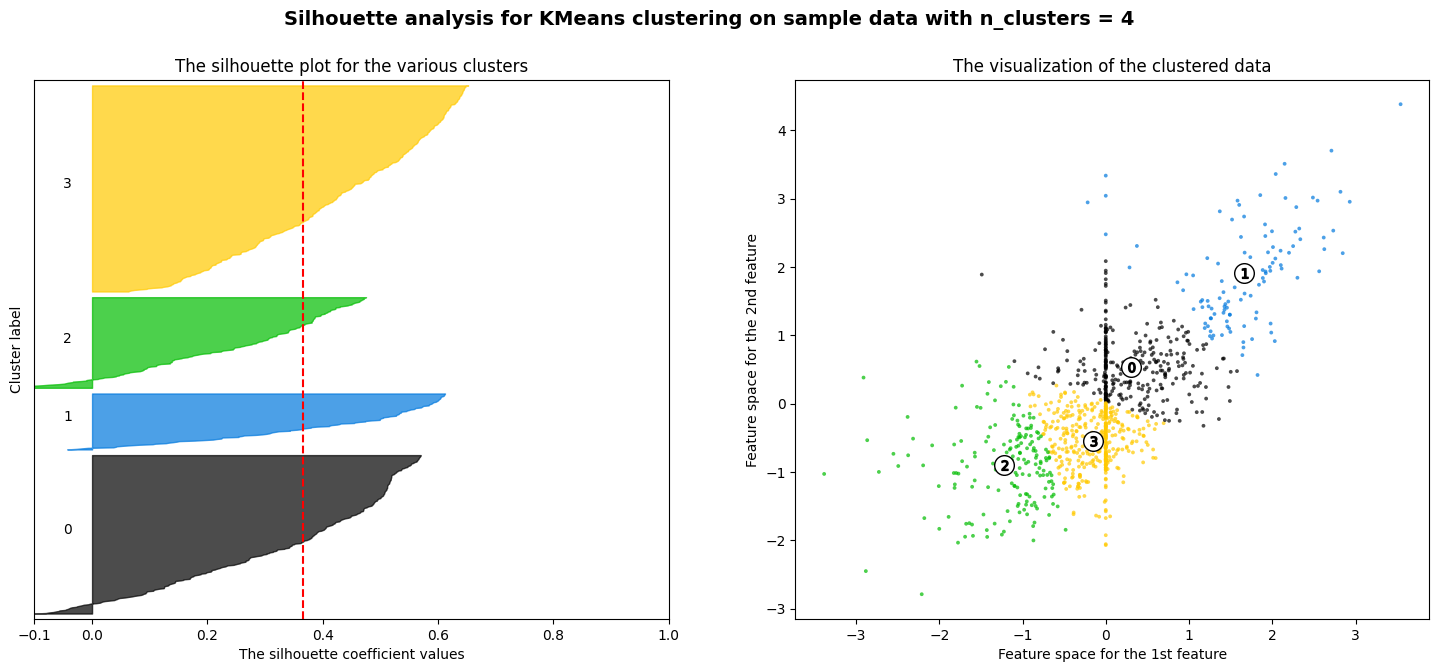

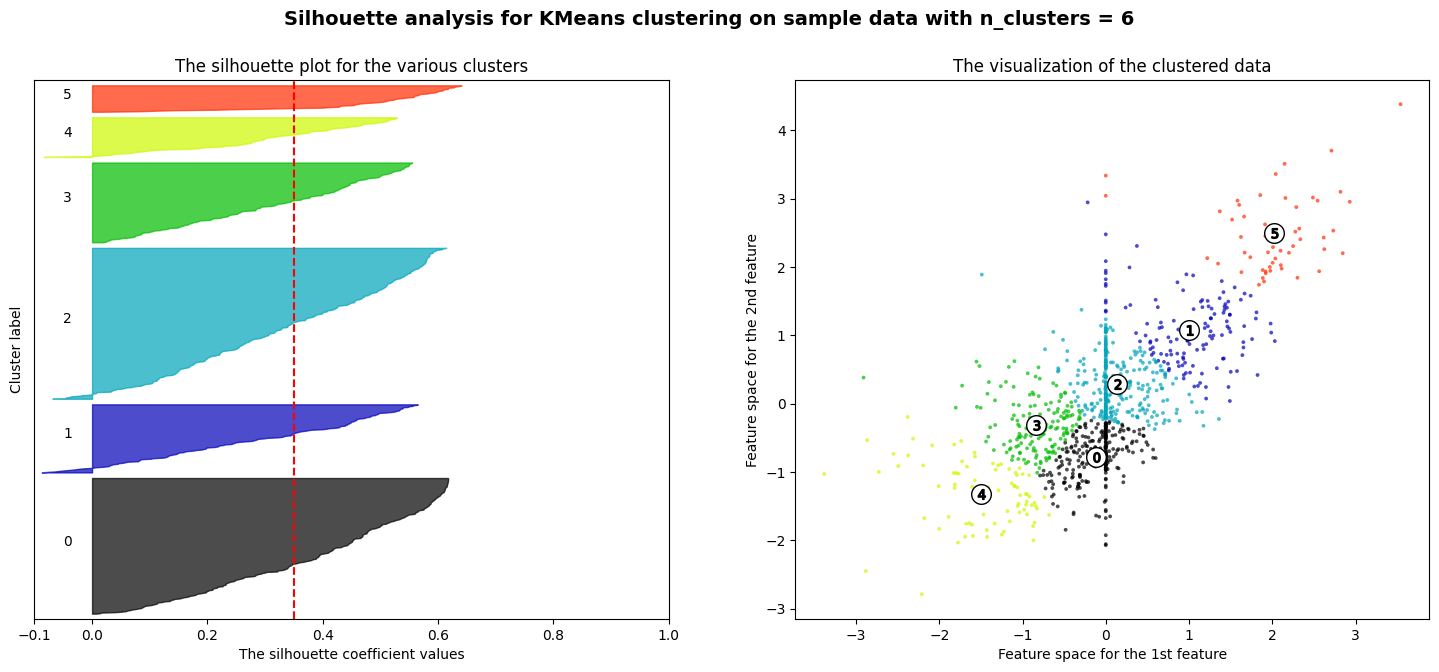

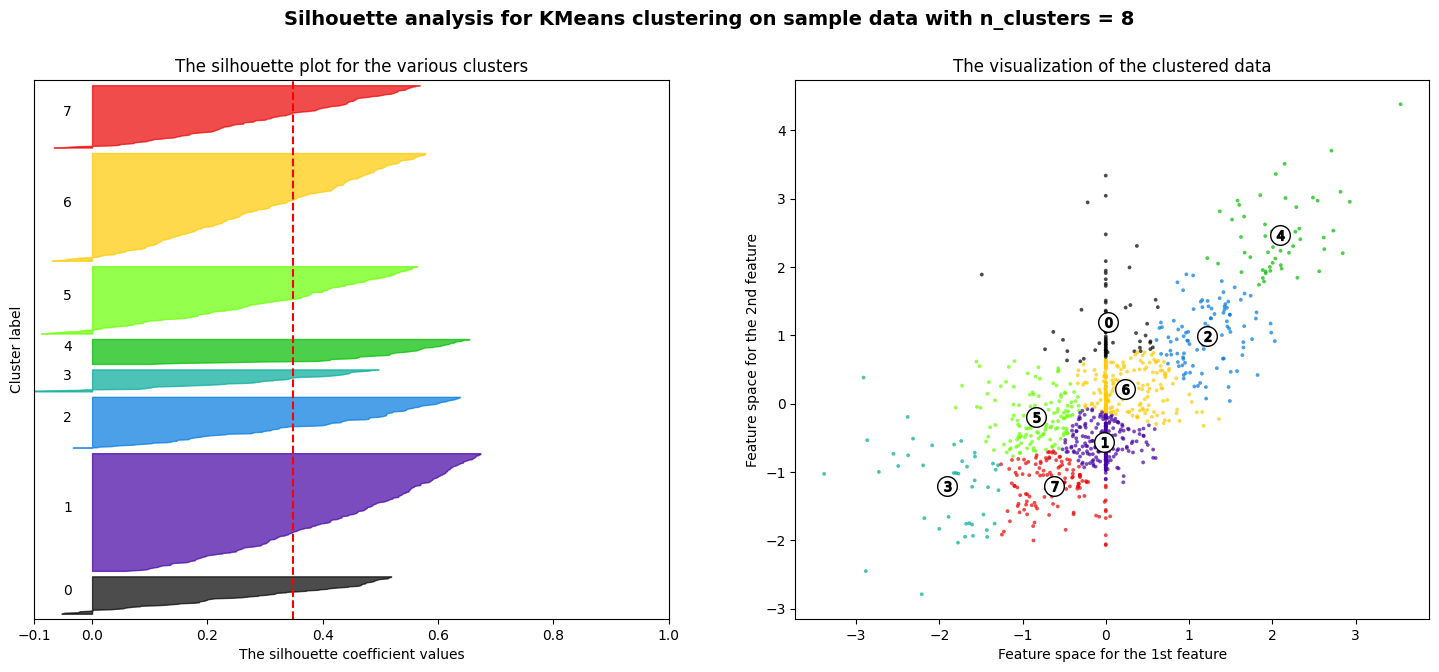

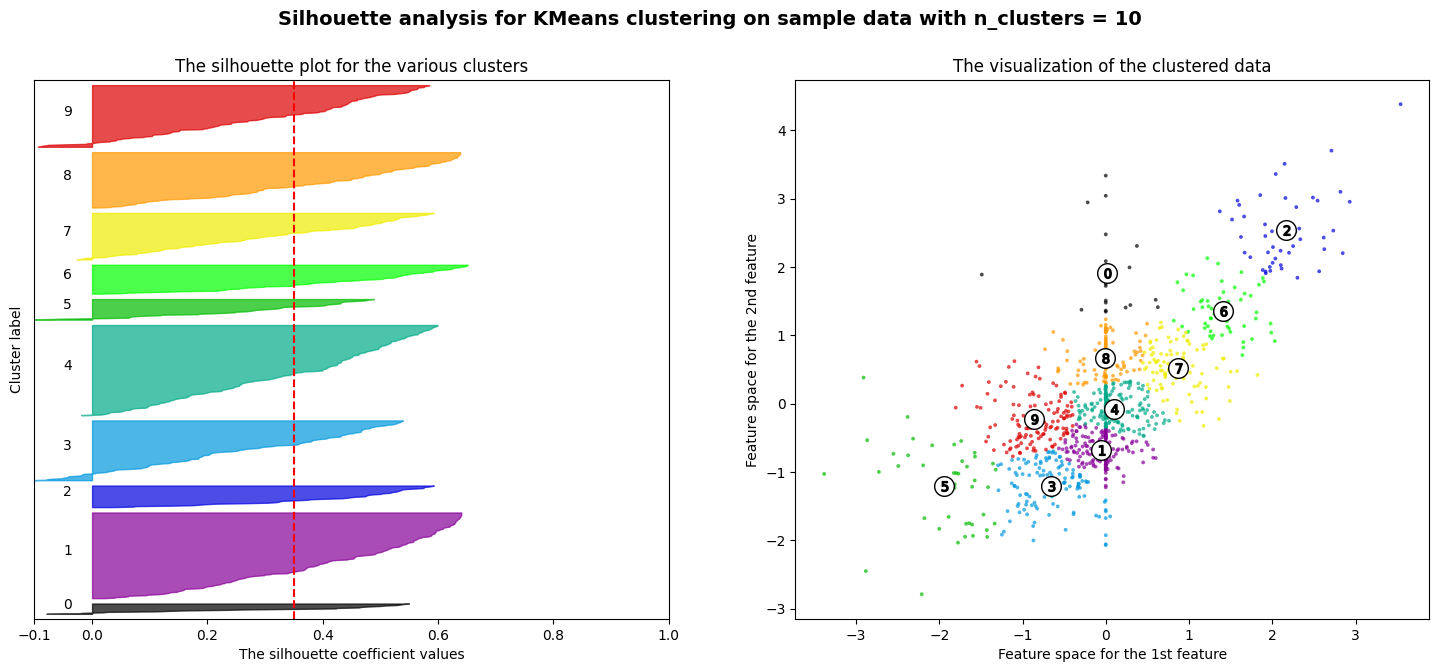

In [36]:
plot_silhouette(X, n_clusters, random_state = 3)

<h3>Incluyendo los atributos numericos disponibles</h3>

In [37]:
features = ['INGRESOS OPERACIONALES 2018_log', 'TOTAL ACTIVOS 2017_log', 'SUPERVISOR', 'REGIÓN', 
'TOTAL PASIVOS 2018_log', 'DEPARTAMENTO DOMICILIO', 'CIUDAD DOMICILIO', 'CIIU', 'TOTAL ACTIVOS 2018_log',
'TOTAL PASIVOS 2017_log', 'TOTAL PATRIMONIO 2018_log','MACROSECTOR', 'TOTAL PATRIMONIO 2017_log']

In [38]:
n_clusters = [2, 3, 4, 6, 8, 10]

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
X = np.nan_to_num(X)

In [40]:
kmeans_inertias = []

for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 4)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

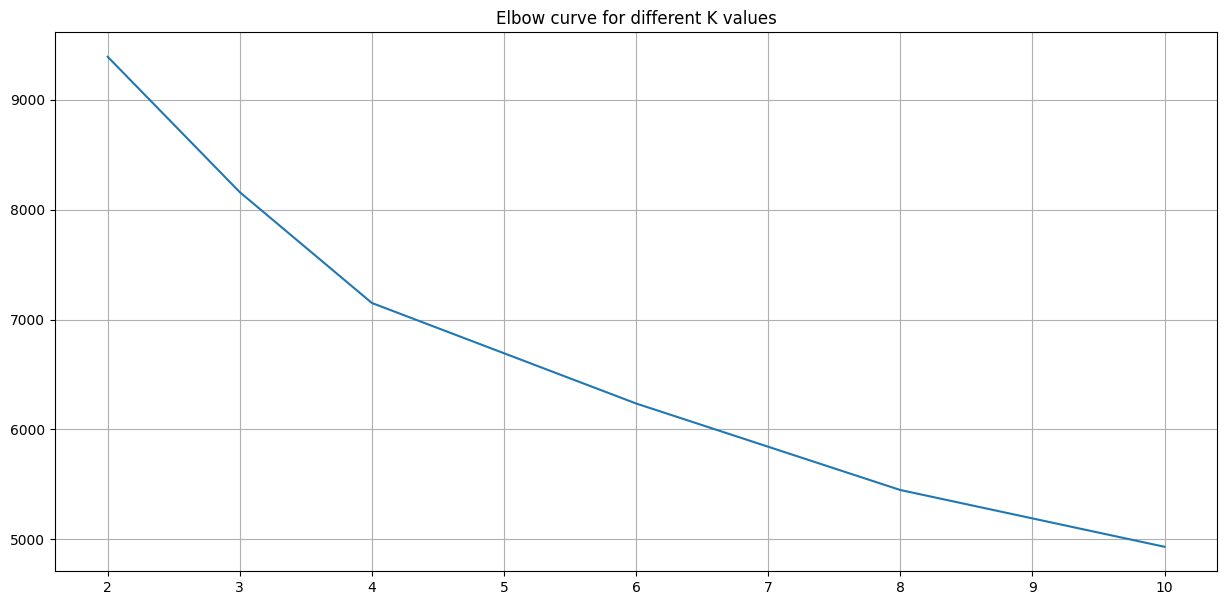

In [41]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.grid(True)
plt.show()

For n_clusters = 2 , the average silhouette score is : 0.2871040774223994
For n_clusters = 3 , the average silhouette score is : 0.1821649686592136
For n_clusters = 4 , the average silhouette score is : 0.19886488940206148
For n_clusters = 6 , the average silhouette score is : 0.20410508395378757
For n_clusters = 8 , the average silhouette score is : 0.19123053076519828
For n_clusters = 10 , the average silhouette score is : 0.20119064492784325


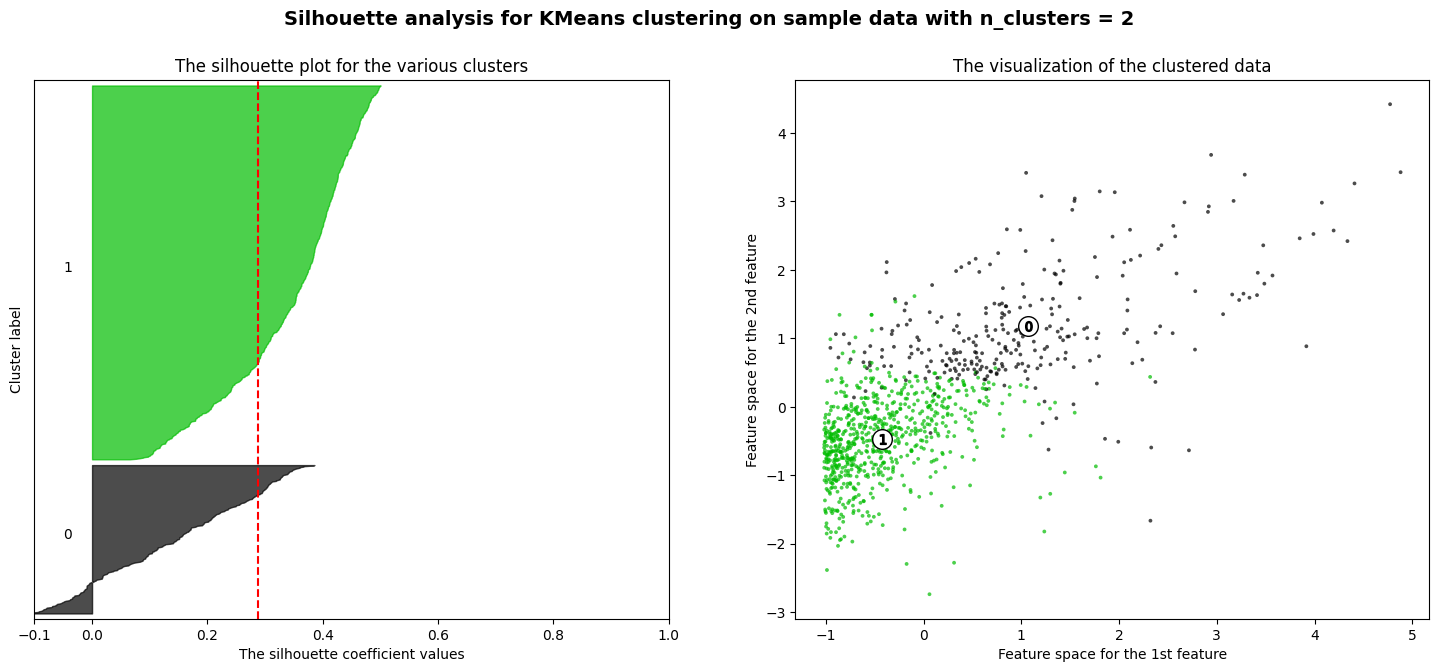

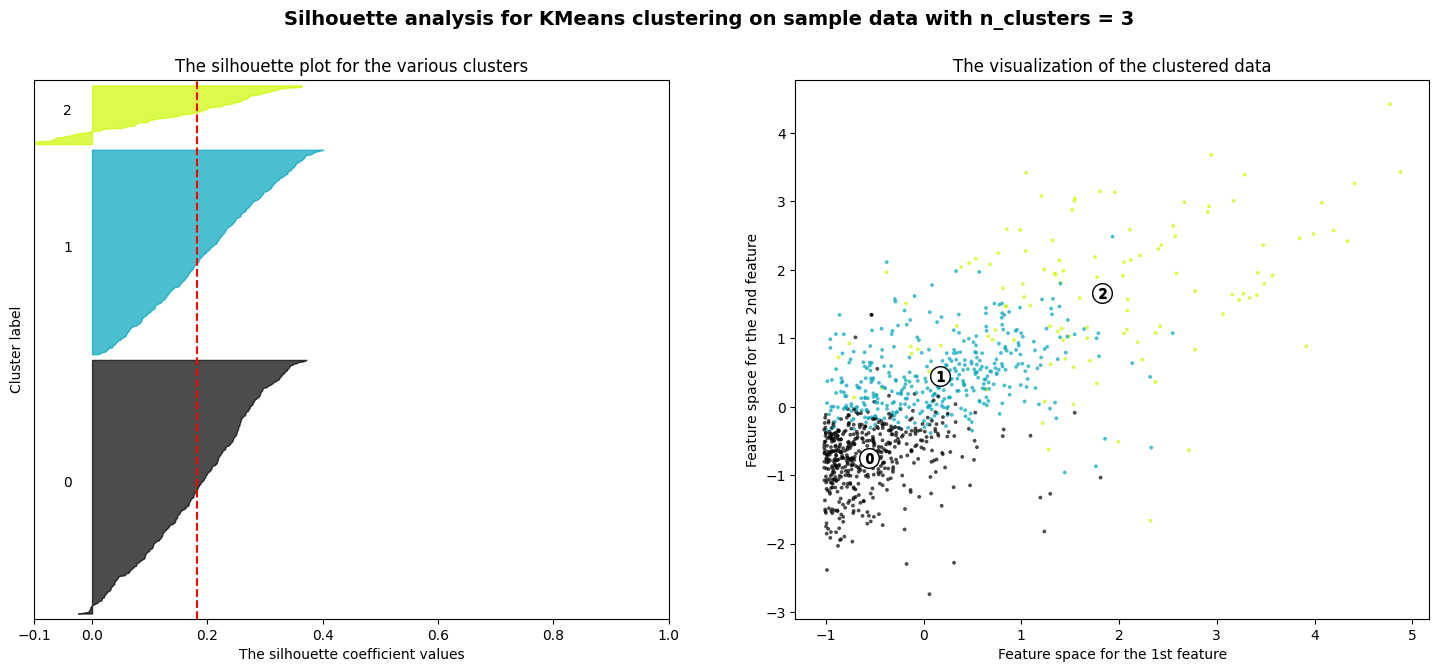

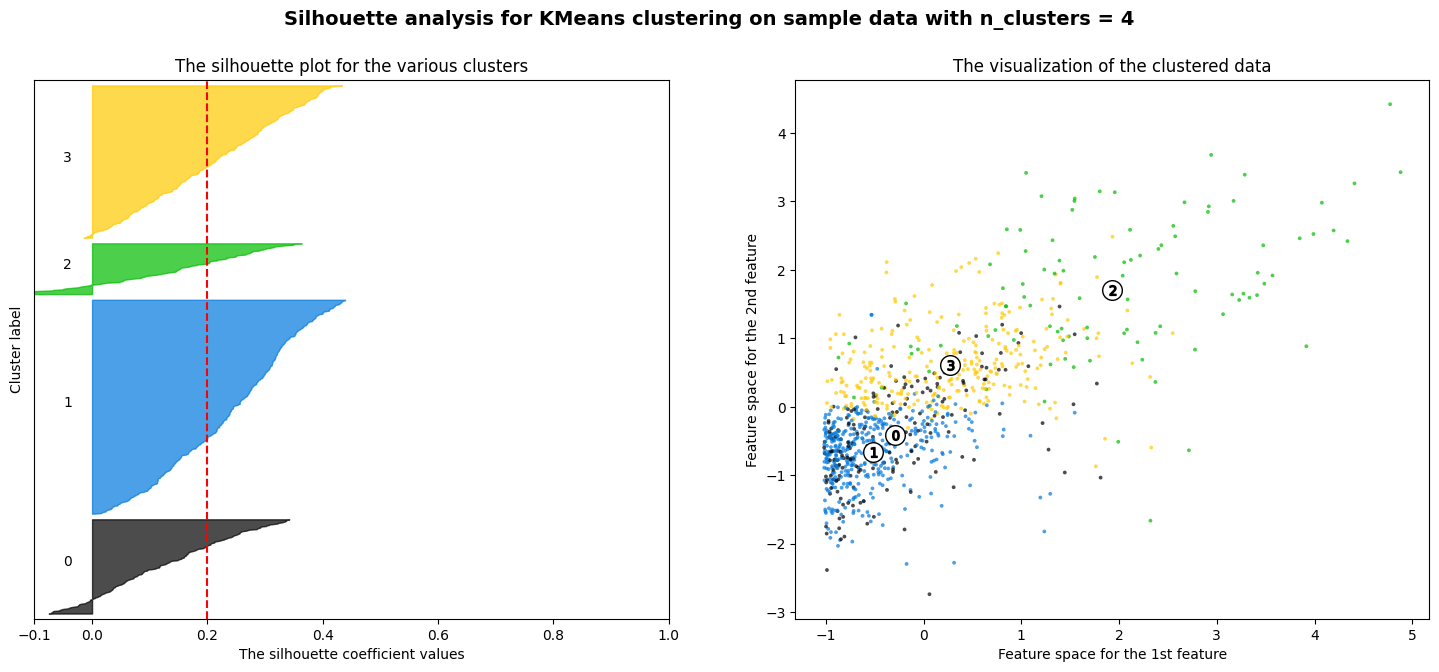

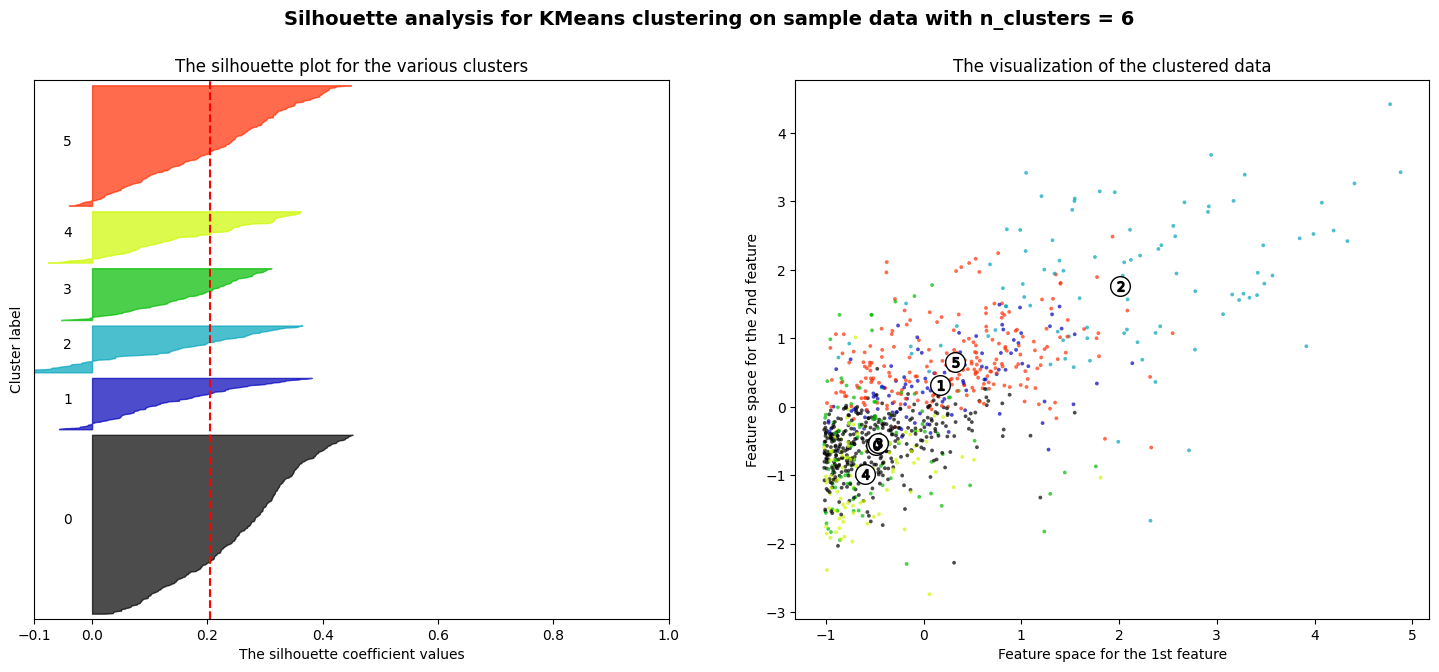

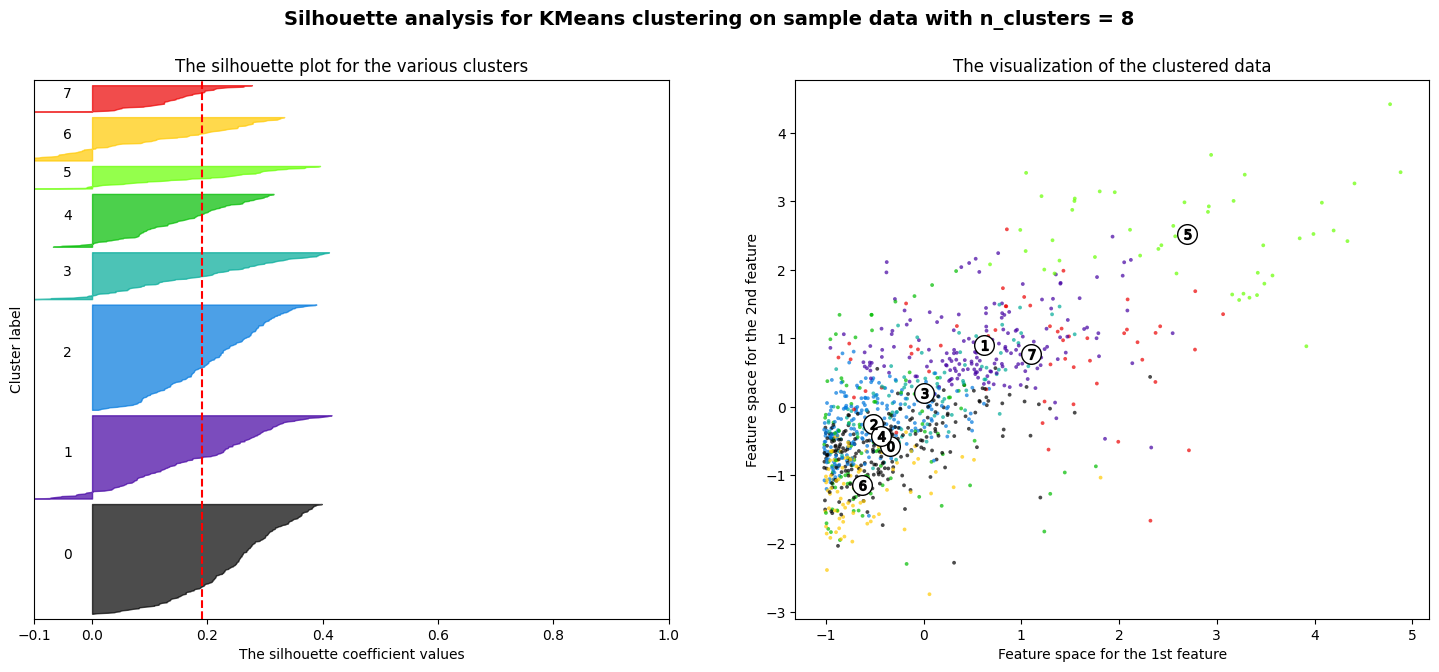

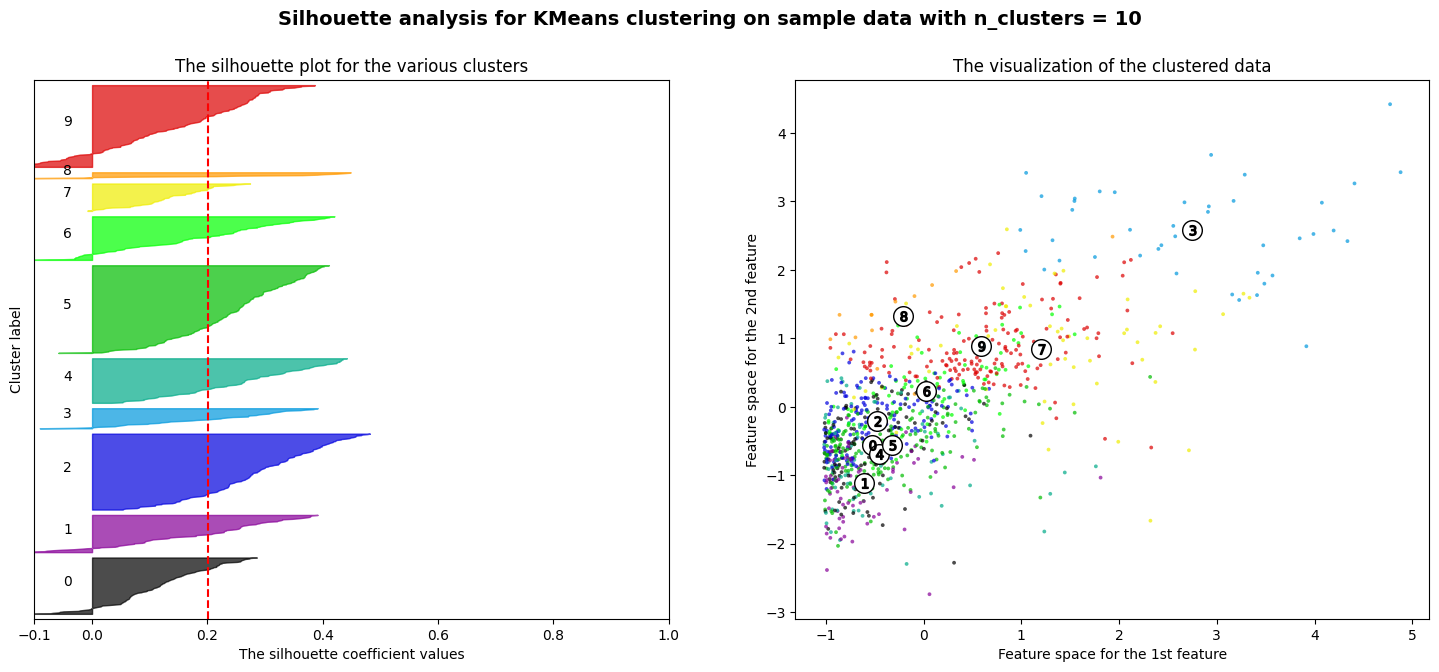

In [42]:
plot_silhouette(X, n_clusters, random_state = 5)

<h3>Validación cualitativa</h3>

In [43]:
kmeans = KMeans(n_clusters = 4, random_state = 5)

In [44]:
data['kmeans'] = kmeans.fit_predict(X)

<AxesSubplot:>

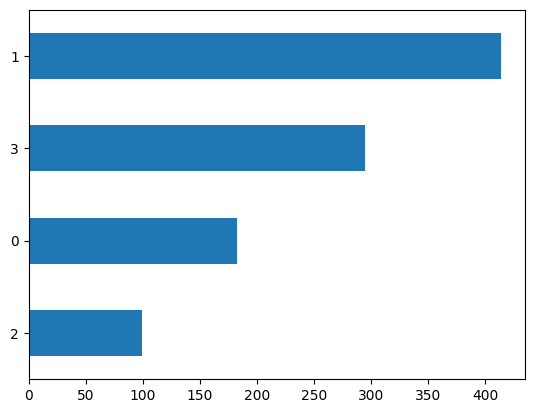

In [45]:
data['kmeans'].value_counts().sort_values().plot.barh()

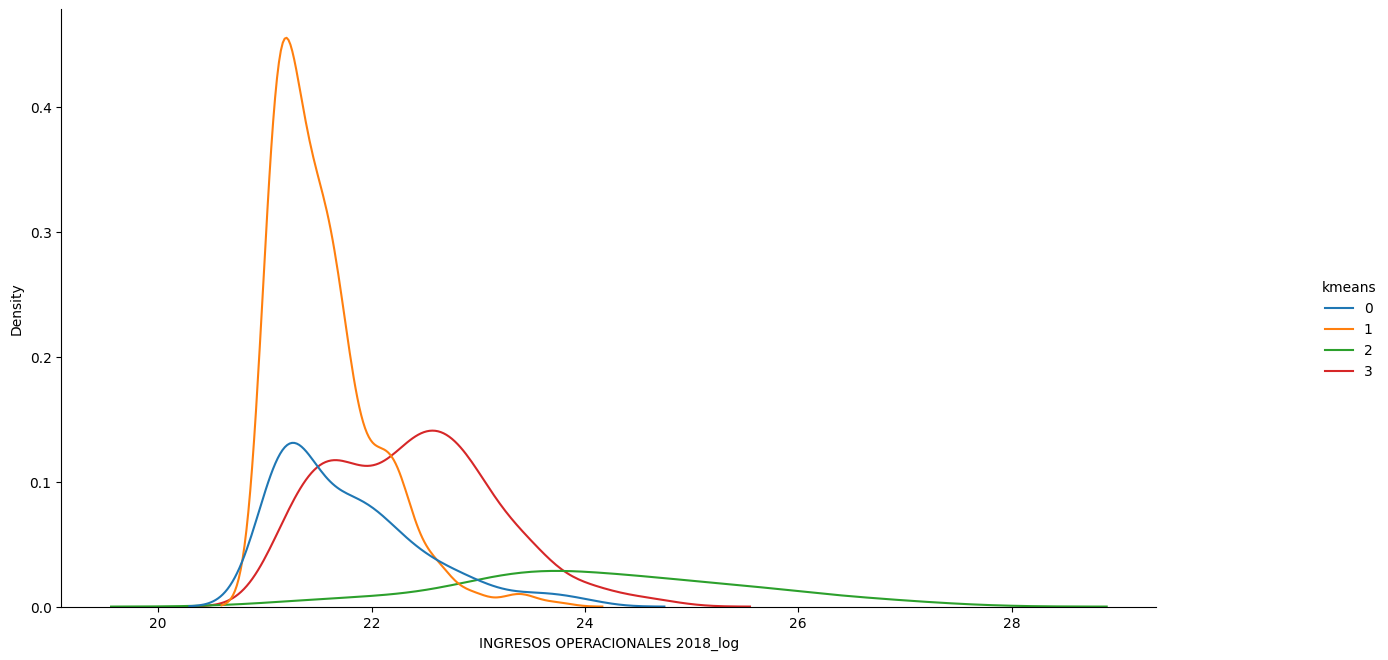

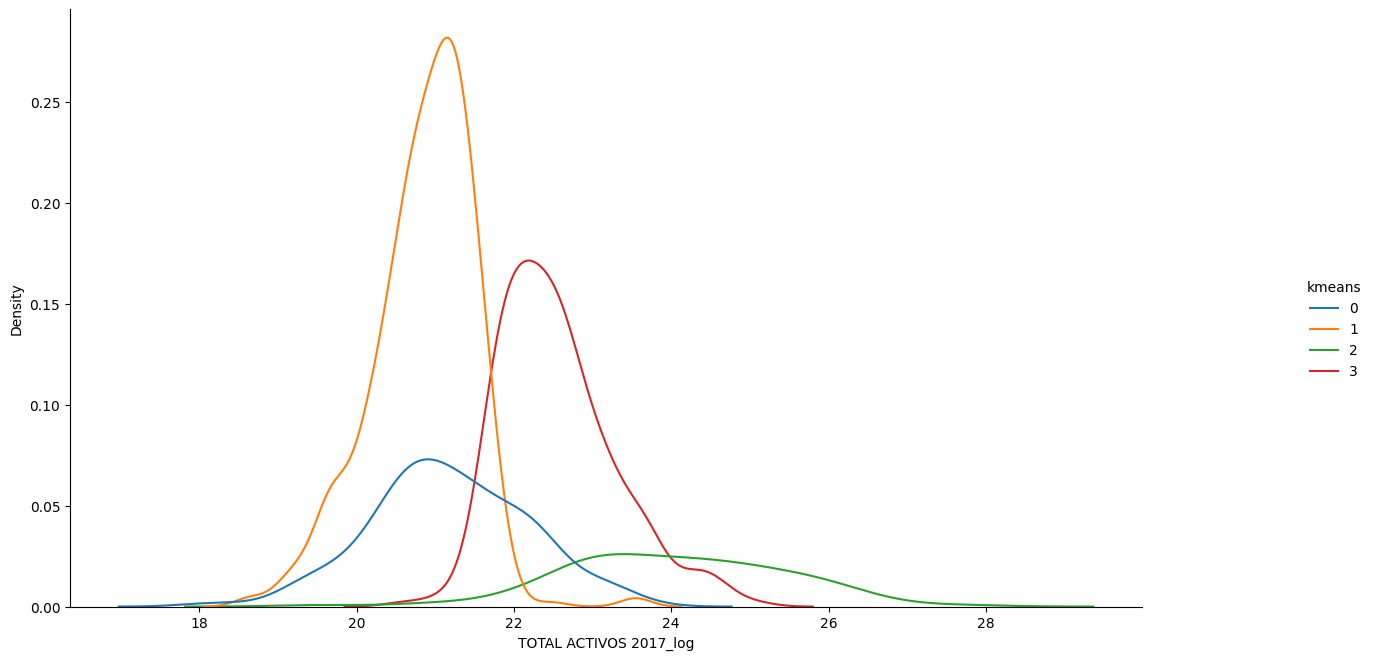

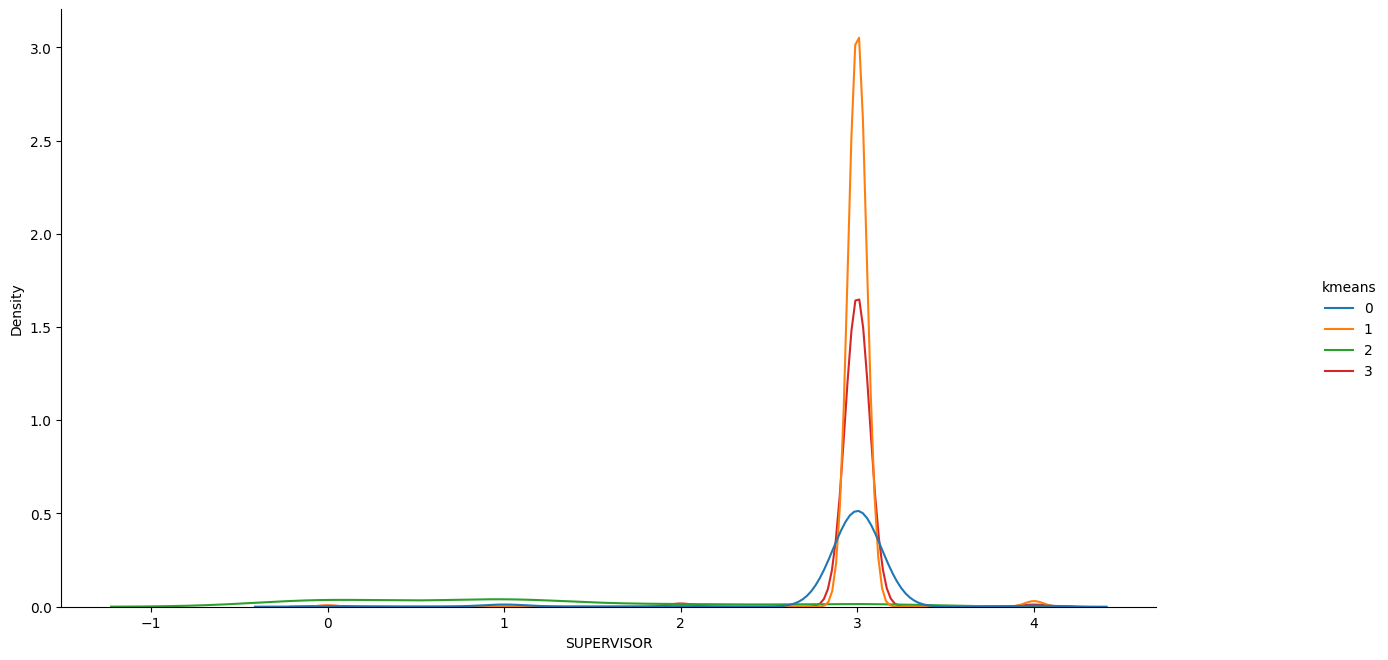

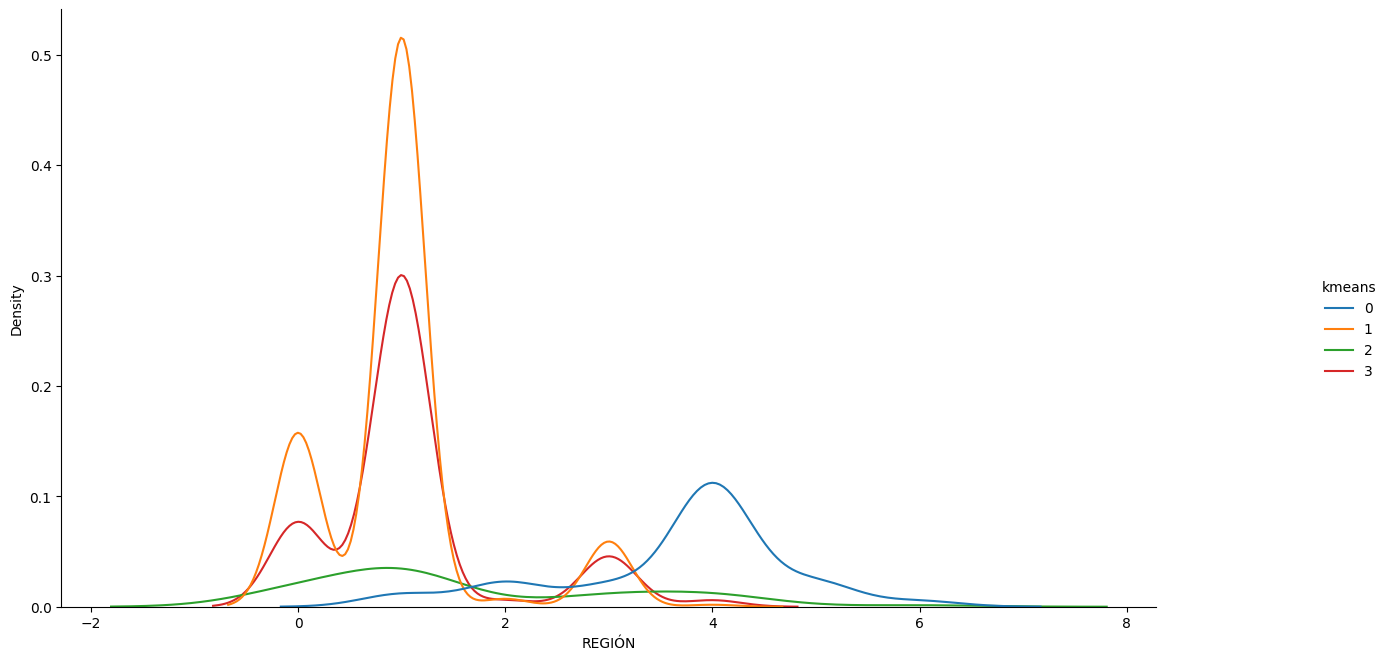

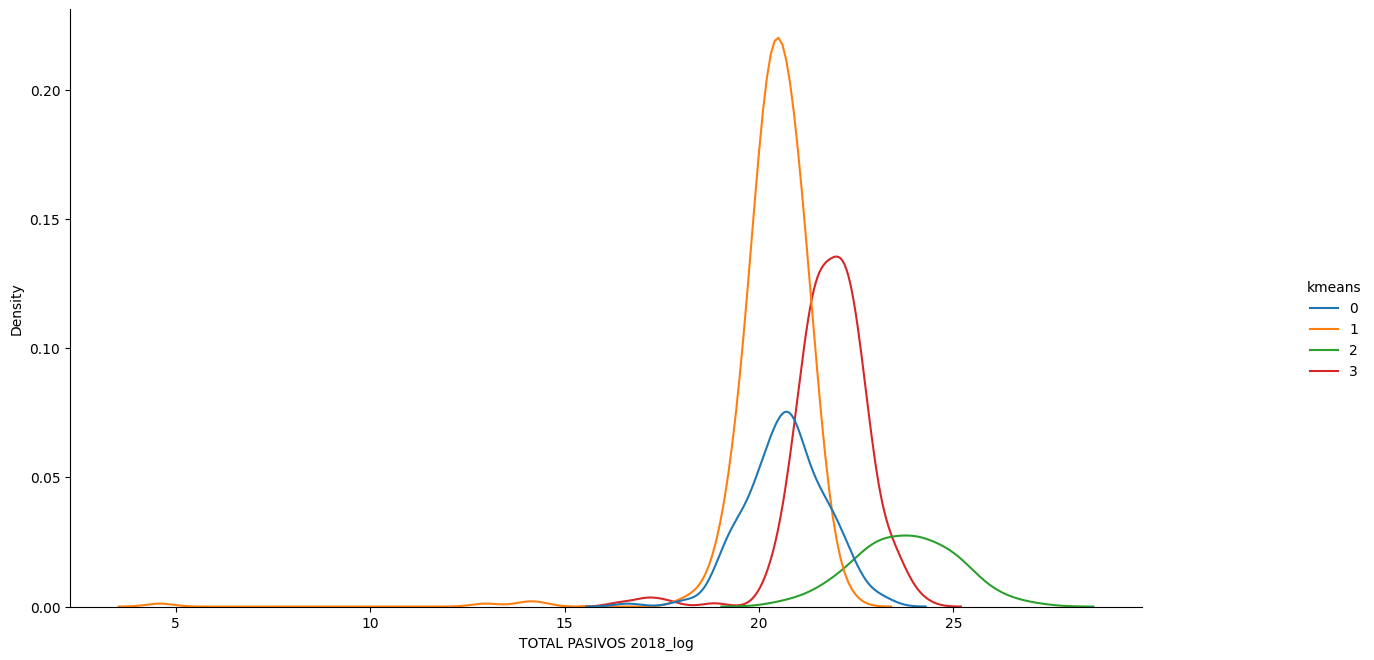

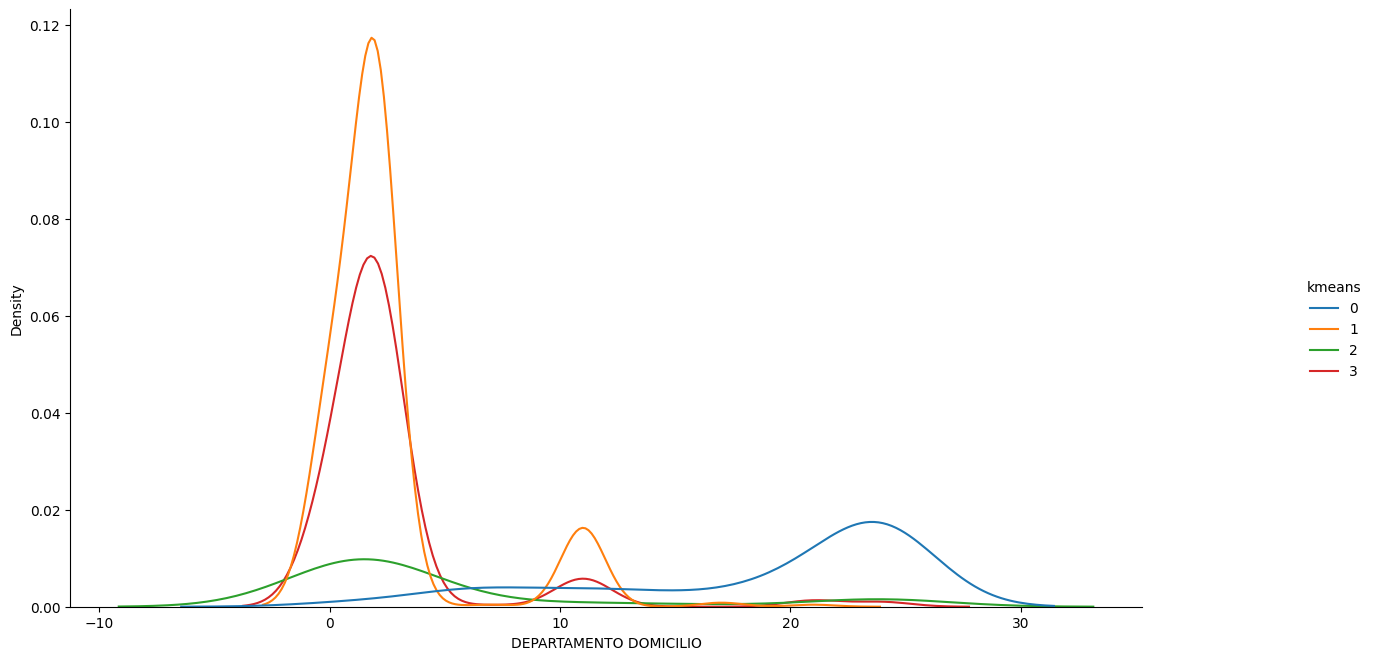

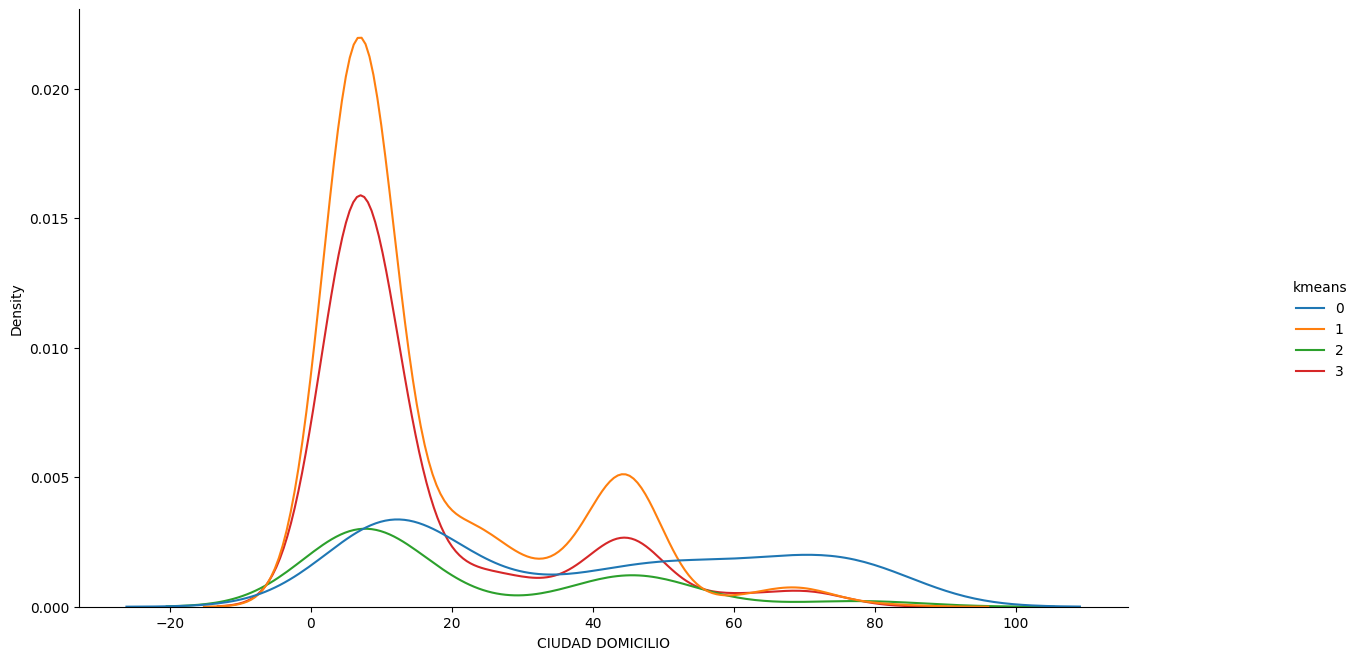

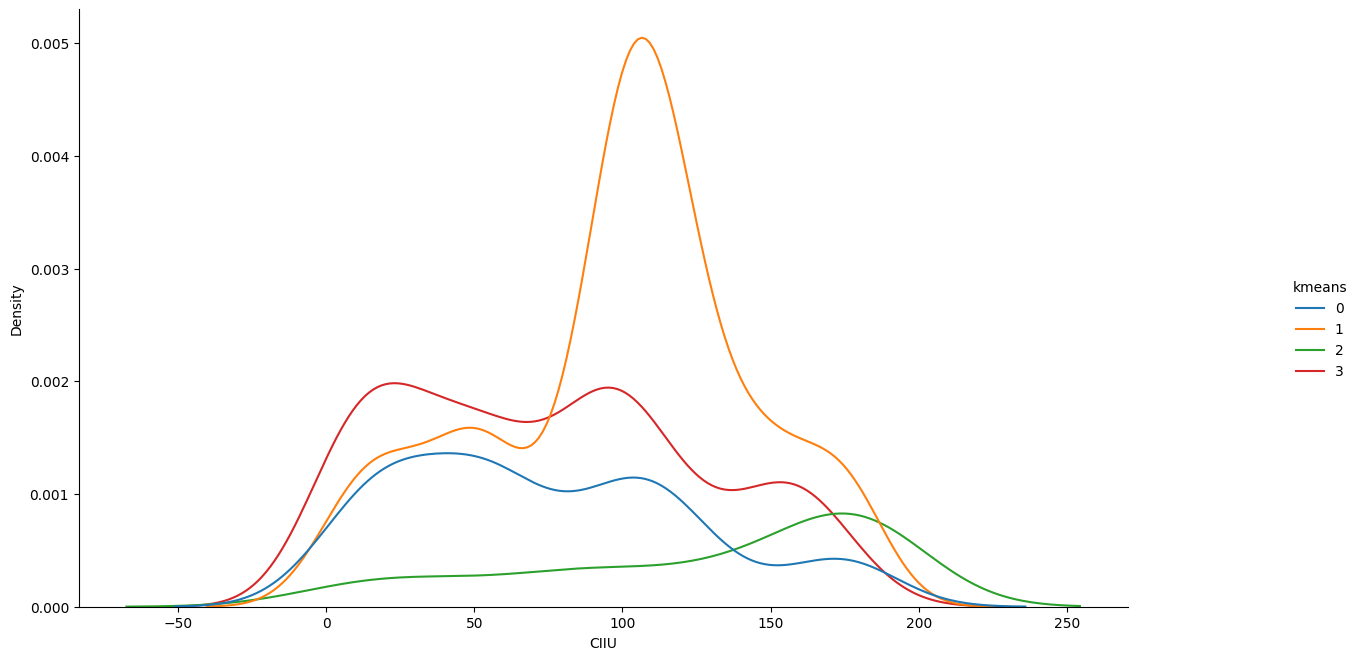

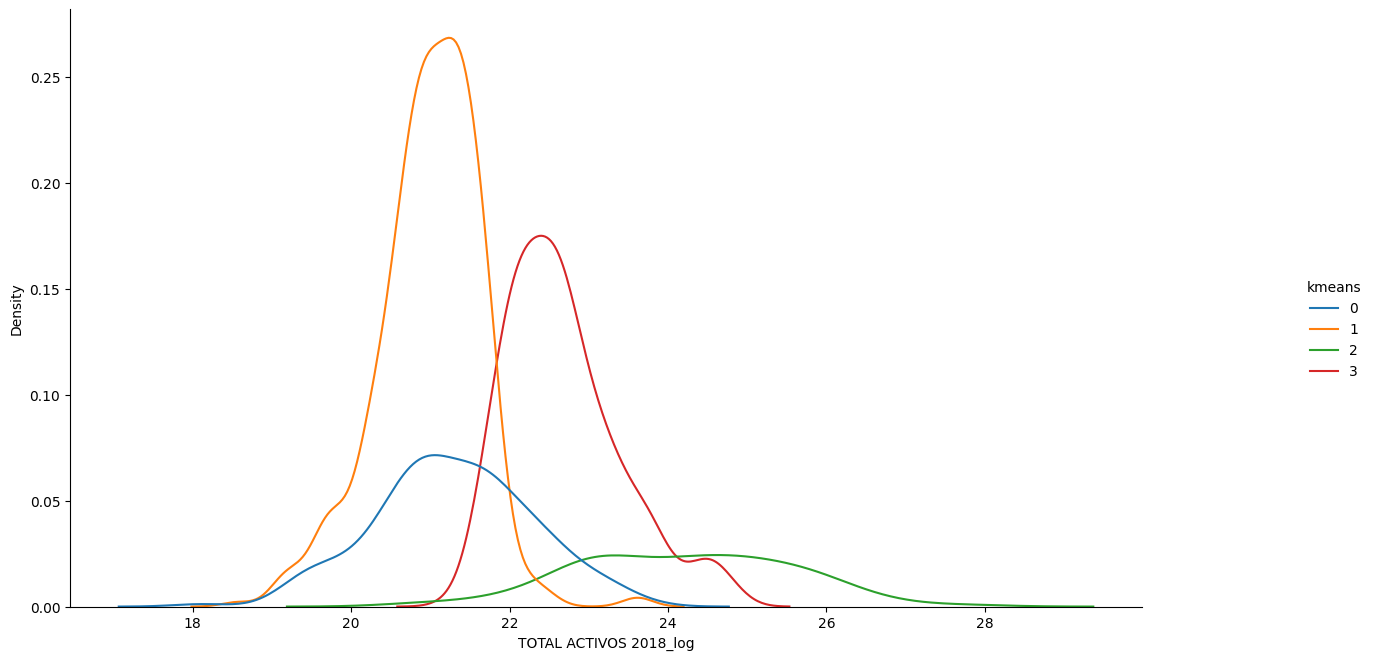

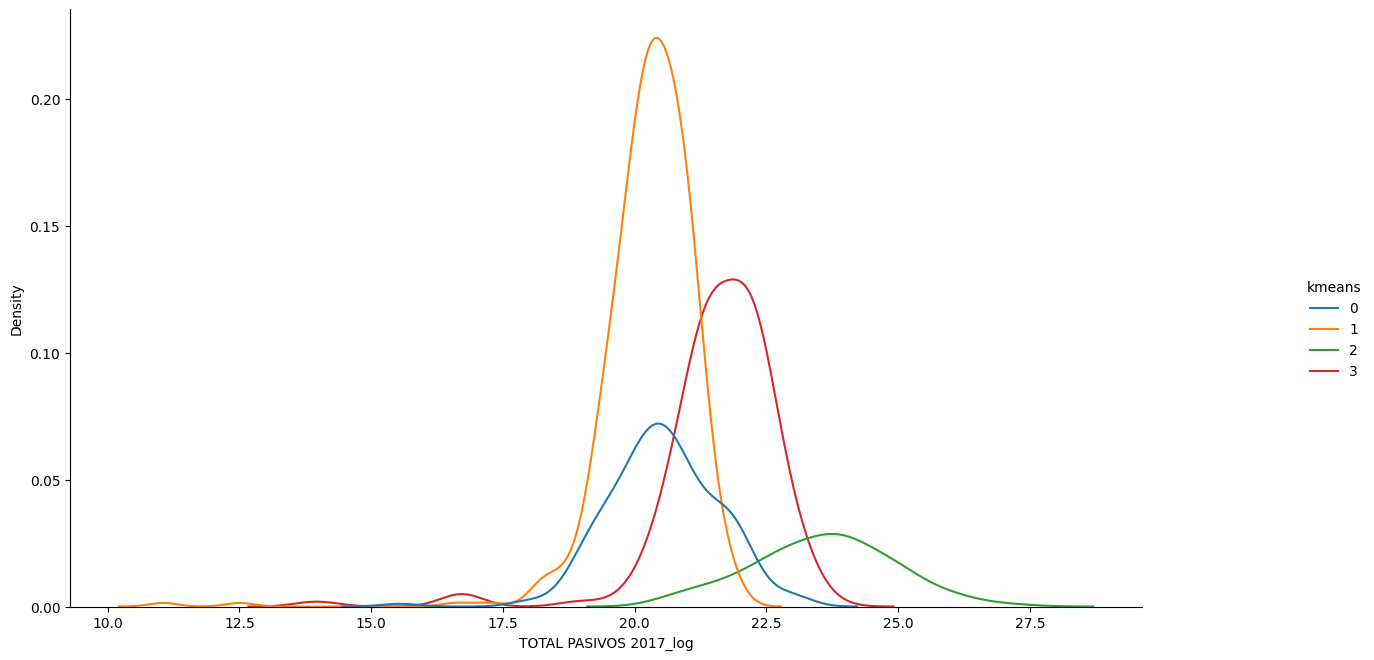

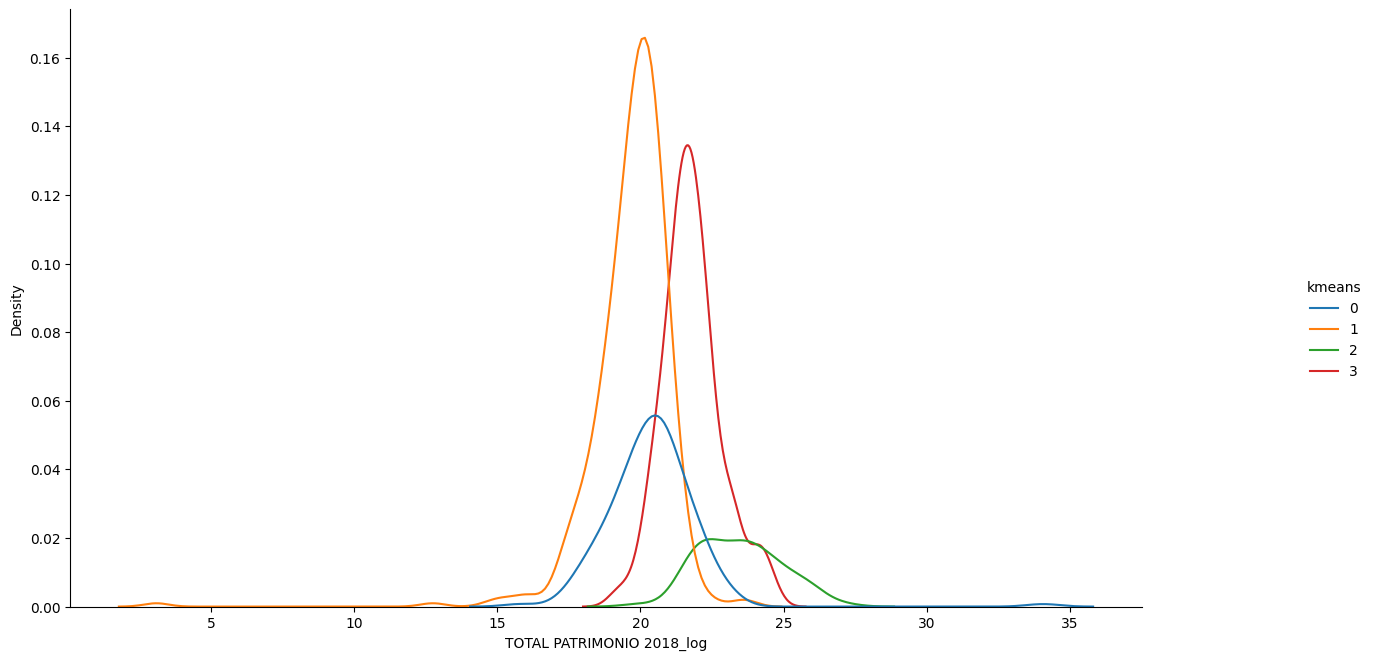

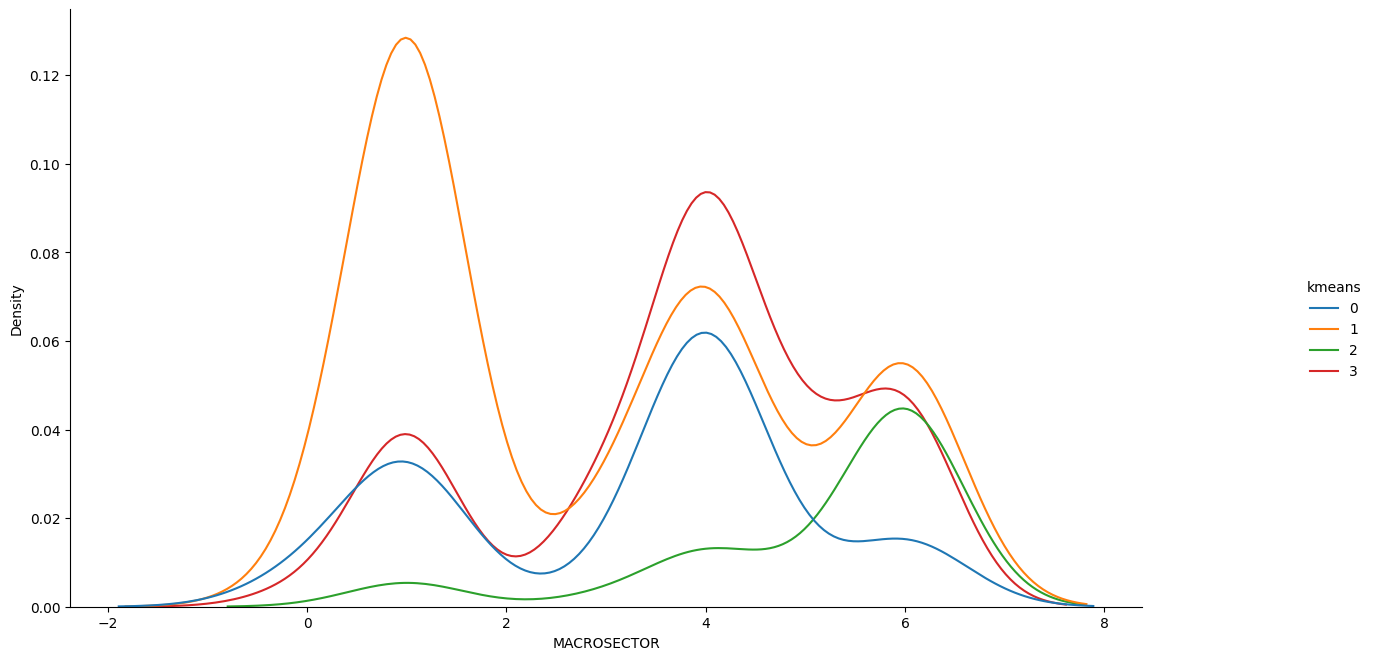

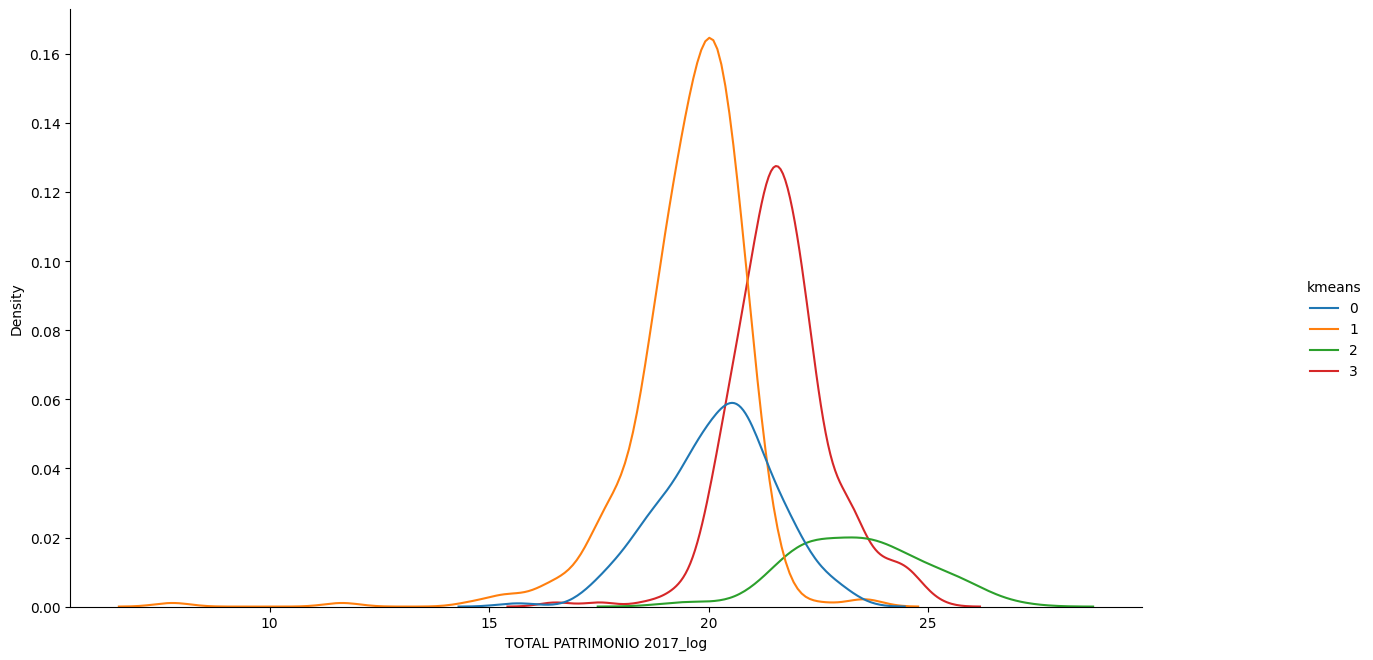

In [46]:
for label in features:
    g = sns.displot(data, x = label, hue = 'kmeans', kind = 'kde', palette = 'tab10')
    g.fig.set_size_inches(15, 7)